# Modelo implementado y Graficación


## Modelo Implementado

Para esta red neuronal se plantearon 4 neuronas de entrada, dos capas intermedias de 15 neuronas cada una y 2 neuronas de salida.
Las neuronas de entrada se plantearon así debido a que son cuatro entradas importantes: 

- La velocidad en $x$ y el desplazamiento en $x$ de la bala 1
- La velocidad en $y$ y el desplazamiento en $y$ de la bala 2

Estos parametros son los básicos que debe tener en cuenta la red para poder hacer los calculos necesarios para una salida adecuada.

En el caso de las salidas se plantearon dos

- Suelo: indica si el jugador debe permanecer en el suelo
- Quieto: indica si el jugador no debe avanzar

La razón por la que se manejan solo dos salidas, es porque al considerar el estatus del suelo como una, si se calcula que el jugador no debe permanecer en el suelo, la se interpreta la salida de la red como un salto. En el caso de quieto, funciona de manera similar, ya que la acción de avanzar, es como un salto horizontal, en cuanto se da la señar de avanzar el jugador avanza a una velocidad de 300 durante un tiempo, despues de ese breve momento, la velocidad del jugador cambia a -300 para que regrese a la posición original.

En el caso de las capas intermedias, la red original proporcionada por el profesor contaba con una red de 2, 6, 6, 2, que posteriormente por las actividades de la clase se resumiría a 2,6,6,1. Teniendo esto en cuenta se considero que si eran el doble de neuronas de entrada y de salida, sería lo mismo con las capas intermedias, es decir, 4, 12, 12, 2. Sin embargo, la capacidad de la red se quedaba corta. Después se intento con una red de 4, 16, 16, 2, considerando que el factor de complejidad al ser 4 neuronas de entrada podría resolverse así. El problema ahora es que esto llevaba a la red a un sobreaprendizaje, no muy brusco, pero si generaba jugadas muy extrañas por parte de la red. 
Intentando distintas configuraciones, se encontró que con la red de 4, 15, 15, 2, se logran muy buenos resultados.

La red de 4, 15, 15, 2 ha traído muy buenos resultados, con esta red es con la que se ha sobrevivido más tiempo, sin embargo, en las jugadas en las que se requiere mucha precisión en el orden de los saltos y el timing respectivo, es muy propensa a perder.

## Graficación de los datos de entrenamiento

In [7]:
# lecturas archivo.csv de estación meteorológica
import pandas as pd
import matplotlib.pyplot as plt

# INGRESO
narchivo = "Data.csv"

# PROCEDIMIENTO
tabla = pd.read_csv(narchivo, sep=';',decimal=',')
n = len(tabla)

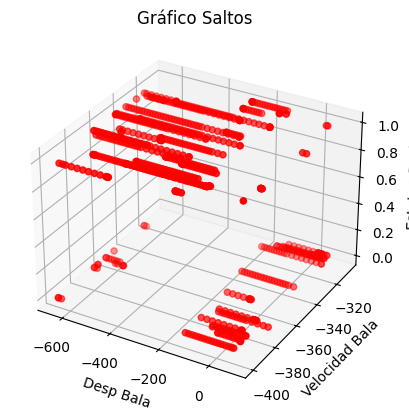

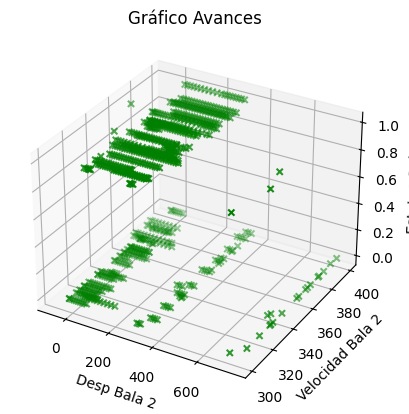

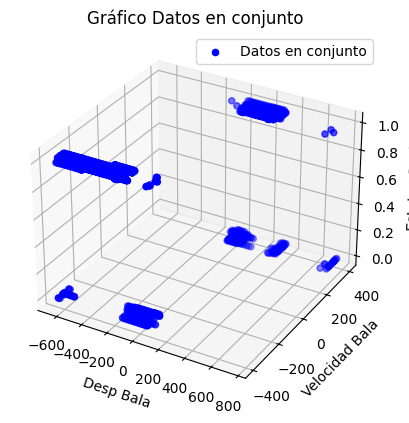

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Cargar los datos desde el CSV con un espacio como delimitador
df = pd.read_csv('Data.csv', delimiter=' ', header=None, names=['despBala', 'velocidadBala', 'despBala2', 'velocidadBala2', 'estatuSuelo', 'estatusQuieto'], dtype=int)

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection='3d')
ax1.scatter(df['despBala'], df['velocidadBala'], df['estatuSuelo'], c='r', marker='o')
ax1.set_xlabel('Desp Bala')
ax1.set_ylabel('Velocidad Bala')
ax1.set_zlabel('Estatus Suelo')
ax1.set_title('Gráfico Saltos')

fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')
ax2.scatter(df['despBala2'], df['velocidadBala2'], df['estatusQuieto'], c='g', marker='x')
ax2.set_xlabel('Desp Bala 2')
ax2.set_ylabel('Velocidad Bala 2')
ax2.set_zlabel('Estatus Quieto')
ax2.set_title('Gráfico Avances')

fig3 = plt.figure()
ax3 = fig3.add_subplot(111, projection='3d')
ax3.scatter(df[['despBala', 'despBala2']], df[['velocidadBala', 'velocidadBala2']], df[['estatuSuelo', 'estatusQuieto']], c='b', marker='o', label='Datos en conjunto')

ax3.set_xlabel('Desp Bala')
ax3.set_ylabel('Velocidad Bala')
ax3.set_zlabel('Estatus Suelo')
ax3.legend()
ax3.set_title('Gráfico Datos en conjunto')

# Mostrar el gráfico
plt.show()


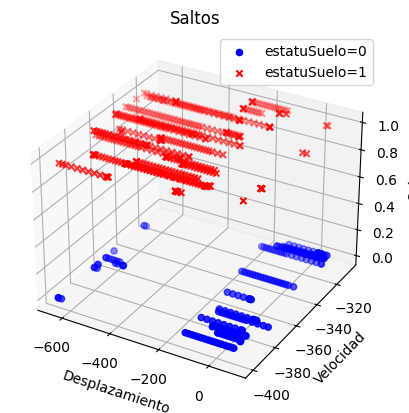

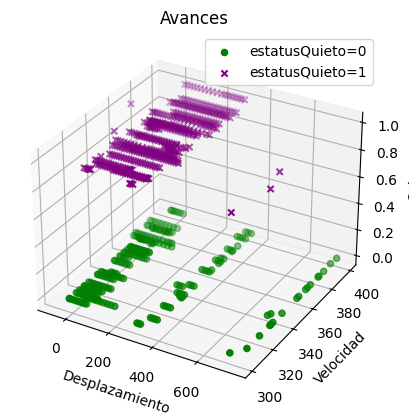

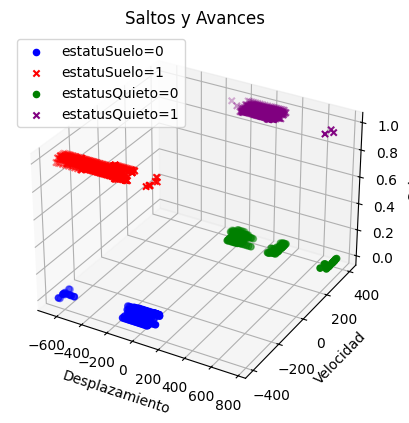

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Cargar los datos desde el CSV especificando que la primera fila es un encabezado
df = pd.read_csv('Data.csv', delimiter=' ', header=None, names=['despBala', 'velocidadBala', 'despBala2', 'velocidadBala2', 'estatuSuelo', 'estatusQuieto'], dtype=int)

# Bala 1
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df[df['estatuSuelo'] == 0]['despBala'], df[df['estatuSuelo'] == 0]['velocidadBala'], df[df['estatuSuelo'] == 0]['estatuSuelo'],c='blue', marker='o', label='estatuSuelo=0')
ax.scatter(df[df['estatuSuelo'] == 1]['despBala'], df[df['estatuSuelo'] == 1]['velocidadBala'], df[df['estatuSuelo'] == 1]['estatuSuelo'],c='red', marker='x', label='estatuSuelo=1')
ax.set_xlabel('Desplazamiento')
ax.set_ylabel('Velocidad')
ax.set_zlabel('Salto')
ax.legend()
ax.set_title('Saltos')
plt.show()


# Bala 2
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df[df['estatusQuieto'] == 0]['despBala2'], df[df['estatusQuieto'] == 0]['velocidadBala2'], df[df['estatusQuieto'] == 0]['estatusQuieto'],c='green', marker='o', label='estatusQuieto=0')
ax.scatter(df[df['estatusQuieto'] == 1]['despBala2'], df[df['estatusQuieto'] == 1]['velocidadBala2'], df[df['estatusQuieto'] == 1]['estatusQuieto'],c='purple', marker='x', label='estatusQuieto=1')
ax.set_xlabel('Desplazamiento')
ax.set_ylabel('Velocidad')
ax.set_zlabel('Salto')
ax.legend()
ax.set_title('Avances')
plt.show()


# Bala 1 y 2
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df[df['estatuSuelo'] == 0]['despBala'], df[df['estatuSuelo'] == 0]['velocidadBala'], df[df['estatuSuelo'] == 0]['estatuSuelo'],c='blue', marker='o', label='estatuSuelo=0')
ax.scatter(df[df['estatuSuelo'] == 1]['despBala'], df[df['estatuSuelo'] == 1]['velocidadBala'], df[df['estatuSuelo'] == 1]['estatuSuelo'],c='red', marker='x', label='estatuSuelo=1')
ax.scatter(df[df['estatusQuieto'] == 0]['despBala2'], df[df['estatusQuieto'] == 0]['velocidadBala2'], df[df['estatusQuieto'] == 0]['estatusQuieto'],c='green', marker='o', label='estatusQuieto=0')
ax.scatter(df[df['estatusQuieto'] == 1]['despBala2'], df[df['estatusQuieto'] == 1]['velocidadBala2'], df[df['estatusQuieto'] == 1]['estatusQuieto'],c='purple', marker='x', label='estatusQuieto=1')
ax.set_xlabel('Desplazamiento')
ax.set_ylabel('Velocidad')
ax.set_zlabel('Salto')
ax.legend()
ax.set_title('Saltos y Avances')
plt.show()

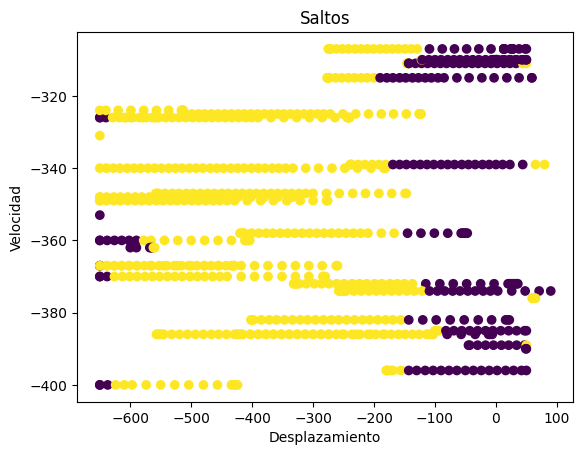

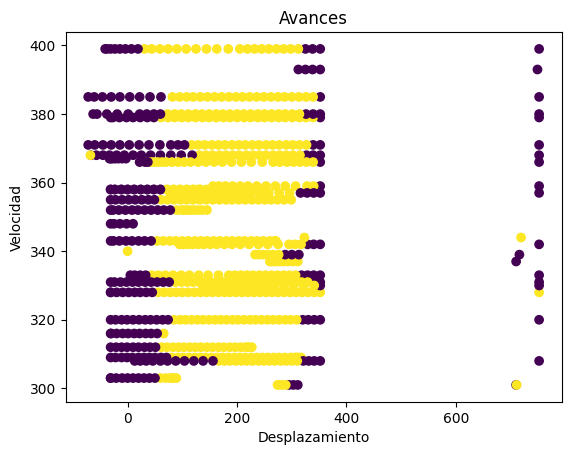

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Data.csv', delimiter=' ', header=None, names=['despBala', 'velocidadBala', 'despBala2', 'velocidadBala2', 'estatuSuelo', 'estatusQuieto'], dtype=int)

# Bala 1
plt.figure()
plt.scatter(df['despBala'], df['velocidadBala'], c=df['estatuSuelo'], cmap='viridis', marker='o')
plt.xlabel('Desplazamiento')
plt.ylabel('Velocidad')
plt.title('Saltos')
plt.show()


# Bala 2
plt.figure()
plt.scatter(df['despBala2'], df['velocidadBala2'], c=df['estatusQuieto'], cmap='viridis', marker='o')
plt.xlabel('Desplazamiento')
plt.ylabel('Velocidad')
plt.title('Avances')
plt.show()

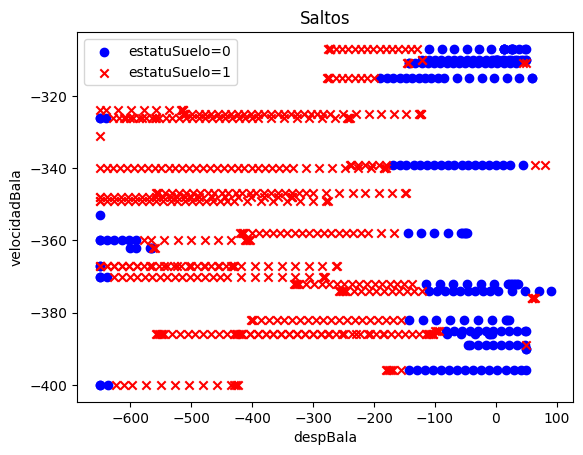

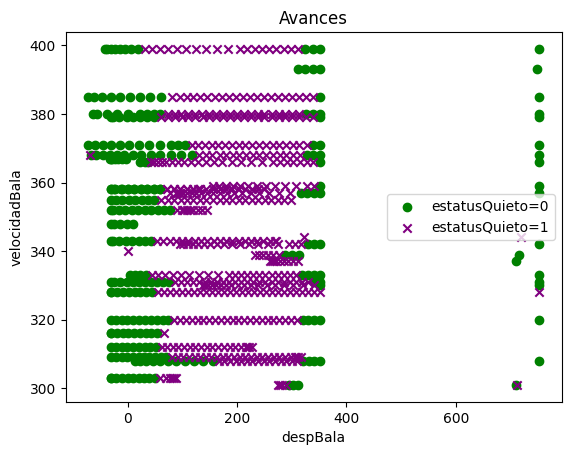

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos desde el CSV especificando que la primera fila es un encabezado
df = pd.read_csv('Data.csv', delimiter=' ', header=None, names=['despBala', 'velocidadBala', 'despBala2', 'velocidadBala2', 'estatuSuelo', 'estatusQuieto'], dtype=int)

# Gráfico Bala 1
plt.figure()
plt.scatter(df[df['estatuSuelo'] == 0]['despBala'], df[df['estatuSuelo'] == 0]['velocidadBala'], color='blue', label='estatuSuelo=0', marker='o')
plt.scatter(df[df['estatuSuelo'] == 1]['despBala'], df[df['estatuSuelo'] == 1]['velocidadBala'], color='red', label='estatuSuelo=1', marker='x')
plt.xlabel('despBala')
plt.ylabel('velocidadBala')
plt.legend()
plt.title('Saltos')
plt.show()


# Gráfico Bala 2
plt.figure()
plt.scatter(df[df['estatusQuieto'] == 0]['despBala2'], df[df['estatusQuieto'] == 0]['velocidadBala2'], color='green', label='estatusQuieto=0', marker='o')
plt.scatter(df[df['estatusQuieto'] == 1]['despBala2'], df[df['estatusQuieto'] == 1]['velocidadBala2'], color='purple', label='estatusQuieto=1', marker='x')
plt.xlabel('despBala')
plt.ylabel('velocidadBala')
plt.legend()
plt.title('Avances')
plt.show()